In [443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [366]:
main_data = pd.read_csv('ml_case_training_data.csv')
main_data.shape

(16096, 32)

In [367]:
df_hist_data = pd.read_csv('ml_case_training_hist_data.csv')
df_hist_data.shape

(193002, 8)

In [368]:
df_churn = pd.read_csv('ml_case_training_output.csv')
churn_dataframe = pd.read_csv('ml_case_training_output.csv')

df_churn.shape

(16096, 2)

# Churn data

In [369]:
df_churn.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


We verify if there are no missing values in the dataframe

In [370]:
Churn_missing_values = df_churn.isnull().sum()
print('Missing values for churn table:\n', Churn_missing_values)

Missing values for churn table:
 id       0
churn    0
dtype: int64


First we will change the churn parameters to: 0 = Stayed, 1 = Churned.

In [371]:
df_churn['churn'] = df_churn['churn'].replace({0:"Stayed", 1:"Churned"})

In [372]:
df_churn.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,Stayed
1,24011ae4ebbe3035111d65fa7c15bc57,Churned
2,d29c2c54acc38ff3c0614d0a653813dd,Stayed
3,764c75f661154dac3a6c254cd082ea7d,Stayed
4,bba03439a292a1e166f80264c16191cb,Stayed


Number of customers that have churned over the past 3 months

In [373]:
Churned_customers = df_churn["churn"].value_counts()
print("Number of customers that have churned:\n", Churned_customers)

Number of customers that have churned:
 Stayed     14501
Churned     1595
Name: churn, dtype: int64


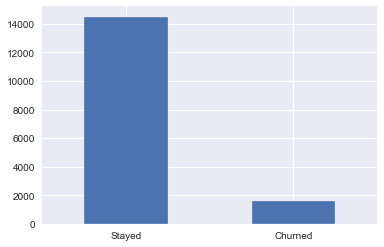

In [448]:
Churned_img = Churned_customers.plot.bar(x="churn", rot=0)

In [450]:
Churned_img.figure.savefig('Churned_customers.png')

Percentage of customers that have churned over the past 3 months

In [374]:
Percentage_churn = df_churn["churn"].value_counts()/df_churn["churn"].shape[0] * 100
print("Percentage of customers that have churned:\n", Percentage_churn)

Percentage of customers that have churned:
 Stayed     90.090706
Churned     9.909294
Name: churn, dtype: float64


<AxesSubplot:>

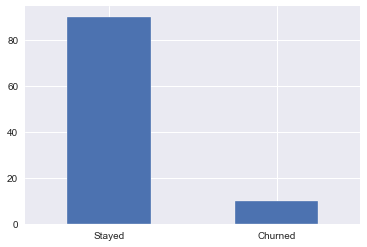

In [442]:
Percentage_churn.plot.bar(x="churn", rot=0)

## Churn data
1. Churn Data is complete
2. Active customers: 14501
3. Churned customers over the past 3 months: 1595
4. Customer retention over the past 3 months is 90.09%
5. Customer attrition over the past 3 months is 9.9%

# Historical data of the company for each client


In [375]:
df_hist_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [376]:
df_hist_data.tail()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [377]:
df_hist_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [378]:
Hist_data_missing_values = df_hist_data.isnull().sum()
print('Missing values for historical data:\n', Hist_data_missing_values)

Missing values for historical data:
 id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64


In [379]:
HD_missing_values_pc = df_hist_data.isnull().mean()*100
print('Percentage of missing values per column:\n', HD_missing_values_pc)

Percentage of missing values per column:
 id              0.000000
price_date      0.000000
price_p1_var    0.704138
price_p2_var    0.704138
price_p3_var    0.704138
price_p1_fix    0.704138
price_p2_fix    0.704138
price_p3_fix    0.704138
dtype: float64


## Historical data

- Less than 1% of the data is missing from the historical data
#### Price of energy
- The average price of energy for the 1st period is 0.1409
- The average price of energy for the 2nd period is 0.0544
- The average price of energy for the 3rd period is 0.0307
#### Price of power
- The average price of power for the 1st period is 43.32
- The average price of power for the 2nd period is 10.69
- The average price of power for the 3rd period is 6.45

We can observe both the price of energy and power decreased over the last 3 periods

# Dealing with missing data

### Historical Data

In [380]:
# Identify the index of the IDs containing missing values.
hist_NAN_index = df_hist_data[df_hist_data.isnull().any(axis=1)].index.values.tolist()

# Obtain a dataframe with the missing values
hist_data_missing = df_hist_data.iloc[hist_NAN_index,:]

# Glimpse at the NaN cases of the pco_hist dataset
hist_data_missing.head(10)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
471,33bb3af90650ac2e9ecac6ff2c975a6b,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
472,33bb3af90650ac2e9ecac6ff2c975a6b,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN
475,33bb3af90650ac2e9ecac6ff2c975a6b,2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN
476,33bb3af90650ac2e9ecac6ff2c975a6b,2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN
874,0e90101b08183cc9548e827e4b256f47,2015-12-01,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
hist_data_missing.count()

id              1359
price_date      1359
price_p1_var       0
price_p2_var       0
price_p3_var       0
price_p1_fix       0
price_p2_fix       0
price_p3_fix       0
dtype: int64

In [382]:
# extract the unique dates of missing data
date_lst = hist_data_missing['price_date'].unique()
id_lst = hist_data_missing['id'].unique()

# Create a time dataframe with the unique dates
time_df = pd.DataFrame(data=date_lst, columns=['price_date'] )

# Glimpse the time dataframe
time_df.sort_values(by=['price_date'])

,price_date
9,2015-01-01
11,2015-02-01
8,2015-03-01
0,2015-04-01
2,2015-05-01
1,2015-06-01
10,2015-07-01
3,2015-08-01
4,2015-09-01
7,2015-10-01


#### Facts
- There are 1359 clients who are missing price data at least in 1 month.

#### Observations 
- After sorting the df_hist_data dataset by id and price_date, we found that some columns are likely to be MNAR.
- The columns containing prices display strong positive correlation in the missingness suggests a case of MNAR.
- This event suggest that multicolinearity might be present in the dataset.

In [383]:
# Main dataset

In [384]:
main_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [385]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

We find the percentage of missing values per column

In [386]:
Main_data_missing_values_pc = main_data.isnull().mean()*100
print('Percentage of missing values per column:\n', Main_data_missing_values_pc)

Percentage of missing values per column:
 id                            0.000000
activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons              

In [387]:
main_data.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


#### Facts
- The average customer lasts 5 years.
- The average net margin is $217.98 .

#### Observations 
- activity_new column is missing 59.30% of its data.
- campaign_disc_ele is missing 100% of its data.
- channel_sales is missing 26.20% of its data.
- date_first_activ is missing 78.20% of its data.
- forecast_base_bill_ele is missing 78.20% of its data.
- forecast_base_bill_year is missing 78.20% of its data.
- forecast_bill_12m is missing 78.20% of its data.
- forecast_cons is missing 78.20% of its data.
- Every other column has less of its 1% of data missing.

In [388]:
#Drop the columns with 50% or more missing values
main_data.drop(['activity_new', 'campaign_disc_ele', 'date_first_activ', 'forecast_base_bill_ele',
                    'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'origin_up'], axis=1, inplace=True)

main_data.isnull().sum()

id                             0
channel_sales               4218
cons_12m                       0
cons_gas_12m                   0
cons_last_month                0
date_activ                     0
date_end                       2
date_modif_prod              157
date_renewal                  40
forecast_cons_12m              0
forecast_cons_year             0
forecast_discount_energy     126
forecast_meter_rent_12m        0
forecast_price_energy_p1     126
forecast_price_energy_p2     126
forecast_price_pow_p1        126
has_gas                        0
imp_cons                       0
margin_gross_pow_ele          13
margin_net_pow_ele            13
nb_prod_act                    0
net_margin                    15
num_years_antig                0
pow_max                        3
dtype: int64

We notice that the column "channel_sales" has the biggest number of missing values. The column corresponds to the code of the sales channel. We can impute the data with the most common value in the column, the mode. We will also use this technique for non numerical columns.

For the remaining numerical columns, since the missing values are less higher we will use the mean imputer.

Finally for the history_data with the prices for each period, there are not many missing values, we will use mean imputing to address missing values.

In [389]:
# Impute missing values for non numerical features with the mode 
for col in ['channel_sales', 'date_end', 'date_modif_prod', 'date_renewal']:
    main_data[col] = main_data[col].fillna(main_data[col].mode().iloc[0])

# Impute missing values for non numerical features with the mean 
main_data.fillna(main_data.mean(), inplace=True)
df_hist_data.fillna(df_hist_data.mean(), inplace=True)

# Check if there are other remaining missing values
print(main_data.isnull().sum().sum() == 0)
print(df_hist_data.isnull().sum().sum() == 0)

True
True


In [390]:
# Check if there are any duplicates
main_data.duplicated().sum()
df_hist_data.duplicated().sum()

0

In [391]:
# Verify the types of our variables
# Vérifier le type des variables

main_data.dtypes

id                           object
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_modif_prod              object
date_renewal                 object
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                   int64
net_margin                  float64
num_years_antig               int64
pow_max                     float64
dtype: object

In [392]:
df_hist_data.dtypes

id               object
price_date       object
price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
dtype: object

We notice here that there are some columns have object as their datatype, we have to convert the datatype to either string, date or boolean. For the other columns, int64 or float64 is fine for the analysis.

In [393]:
# Convert the object column to the correct datatype
import datetime

main_data['id'] = main_data['id'].astype('string')
main_data['channel_sales'] = main_data['channel_sales'].astype('string')

main_data['date_activ'] = main_data['date_activ'].astype({'date_activ': 'datetime64[ns]'})
main_data['date_end'] = main_data['date_end'].astype({'date_end': 'datetime64[ns]'})
main_data['date_modif_prod'] = main_data['date_modif_prod'].astype({'date_modif_prod': 'datetime64[ns]'})
main_data['date_renewal'] = main_data['date_renewal'].astype({'date_renewal': 'datetime64[ns]'})

main_data['has_gas'] = main_data['has_gas'].astype(bool)

main_data.dtypes

id                                  string
channel_sales                       string
cons_12m                             int64
cons_gas_12m                         int64
cons_last_month                      int64
date_activ                  datetime64[ns]
date_end                    datetime64[ns]
date_modif_prod             datetime64[ns]
date_renewal                datetime64[ns]
forecast_cons_12m                  float64
forecast_cons_year                   int64
forecast_discount_energy           float64
forecast_meter_rent_12m            float64
forecast_price_energy_p1           float64
forecast_price_energy_p2           float64
forecast_price_pow_p1              float64
has_gas                               bool
imp_cons                           float64
margin_gross_pow_ele               float64
margin_net_pow_ele                 float64
nb_prod_act                          int64
net_margin                         float64
num_years_antig                      int64
pow_max    

In [394]:
df_hist_data['id'] = df_hist_data['id'].astype('string')
df_hist_data['price_date'] = df_hist_data['price_date'].astype({'price_date': 'datetime64[ns]'})
df_hist_data.dtypes

id                      string
price_date      datetime64[ns]
price_p1_var           float64
price_p2_var           float64
price_p3_var           float64
price_p1_fix           float64
price_p2_fix           float64
price_p3_fix           float64
dtype: object

# Merging the churn dataset with the main dataset

In [395]:
# Merge dataset with churn data
train = pd.merge(main_data, churn_dataframe, on='id')
train['id'] = train['id'].astype('string')
train.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,58.995952,True,831.8,-41.76,-41.76,1,1732.36,3,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,40.606701,True,0.0,25.44,25.44,2,678.99,3,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,foosdfpfkusacimwkcsosbicdxkicaua,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,44.311378,True,0.0,16.38,16.38,1,18.89,6,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,44.311378,True,0.0,28.60,28.60,1,6.60,6,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,44.311378,True,0.0,30.22,30.22,1,25.46,6,13.200,0


# Correlation Analysis 

We will perform different analysis by plotting various graphs, such as histograms, box plots and count plots. We will also use the correlation method to define the dependency of each variable.

# Automatic EDA 
!pip install xlrd
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('ml_case_training_data.csv')

In [396]:
train.corr()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.471233,0.919545,0.165168,0.139526,-0.043551,0.085996,-0.033425,0.146229,-0.025326,NaN,0.139353,-0.065184,-0.045558,0.308567,0.119910,0.008810,0.102422,-0.051759
cons_gas_12m,0.471233,1.000000,0.447209,0.059525,0.057619,-0.014407,0.040327,-0.021608,0.075628,-0.026212,NaN,0.060609,-0.016866,-0.008242,0.272005,0.058928,-0.008626,0.052365,-0.040880
cons_last_month,0.919545,0.447209,1.000000,0.129574,0.151476,-0.037699,0.076066,-0.024195,0.122922,-0.020017,NaN,0.153861,-0.054069,-0.037665,0.350711,0.096343,0.004860,0.089565,-0.046931
forecast_cons_12m,0.165168,0.059525,0.129574,1.000000,0.746076,0.014759,0.390550,-0.214928,0.243144,0.057530,NaN,0.725550,-0.184120,-0.141596,0.013283,0.768609,0.064431,0.583098,0.007395
forecast_cons_year,0.139526,0.057619,0.151476,0.746076,1.000000,-0.008929,0.329201,-0.204421,0.223916,0.053256,NaN,0.981732,-0.139138,-0.106546,0.013811,0.537545,0.066105,0.442225,0.002756
forecast_discount_energy,-0.043551,-0.014407,-0.037699,0.014759,-0.008929,1.000000,-0.019350,0.319202,0.049174,0.024477,NaN,0.011294,0.198510,0.150511,0.055132,0.013423,-0.071420,-0.022107,0.012179
forecast_meter_rent_12m,0.085996,0.040327,0.076066,0.390550,0.329201,-0.019350,1.000000,-0.555331,0.632863,0.013514,NaN,0.296259,-0.018953,0.000856,0.000050,0.336070,0.112271,0.600566,0.029971
forecast_price_energy_p1,-0.033425,-0.021608,-0.024195,-0.214928,-0.204421,0.319202,-0.555331,1.000000,-0.364849,0.389218,NaN,-0.163364,0.183813,0.029005,0.025841,-0.184191,-0.199077,-0.344541,-0.003293
forecast_price_energy_p2,0.146229,0.075628,0.122922,0.243144,0.223916,0.049174,0.632863,-0.364849,1.000000,-0.137244,NaN,0.209404,0.063086,0.073783,0.025935,0.250382,0.102562,0.331251,0.025254
forecast_price_pow_p1,-0.025326,-0.026212,-0.020017,0.057530,0.053256,0.024477,0.013514,0.389218,-0.137244,1.000000,NaN,0.051112,-0.114243,-0.133695,-0.011410,-0.005481,-0.037790,0.051330,0.003980


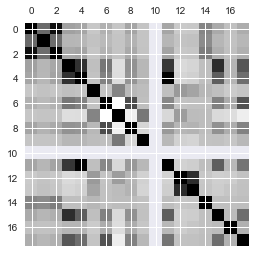

In [397]:
import matplotlib.pyplot as plt
plt.matshow(main_data.corr())

After taking a look at our correlation heatmap, we notice that imp_cons and forecast_cons are very high correlated variables, with a correlation of 1, they provide the same information, so we will drop the column forecast_cons. Since the column had many missing values, we already dropped it, so we didn't lose any valuable informations when deleting the forecast_cons column.

In [398]:
# Remove outliers
from scipy import stats
float_columns = [col for col in train.columns if train[col].dtype == 'float64']
train = train[(np.abs(stats.zscore(train[float_columns])) < 3).all(axis=1)]

train.shape

(14459, 25)

In [399]:
# Create new feature duration
train['duration'] = (train['date_end'] - train['date_activ']).dt.days
print(train['duration'])

1        1096
2        2566
3        2192
4        2192
5        2192
         ... 
16091    1445
16092    1461
16093    1460
16094    1461
16095    2556
Name: duration, Length: 14459, dtype: int64


In [400]:
# Drop dates columns
train.drop(['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], axis=1, inplace=True)

After deleting the date columns we still have to deal with the non numerical categorical column to have a ready dataset. For this we will use encoding.
The has_gas column in a boolean column, we will transform the True and False values into 0 and 1 values.

In [401]:
# Map boolean values into 0 and 1
train['has_gas'] = train['has_gas'].astype('int64')

In [402]:
train.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,1,0.00,25.44,25.44,2,678.99,3,43.648,1,1096
2,d29c2c54acc38ff3c0614d0a653813dd,foosdfpfkusacimwkcsosbicdxkicaua,4660,0,0,189.95,0,0.0,16.27,0.145711,...,1,0.00,16.38,16.38,1,18.89,6,13.800,0,2566
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,1,0.00,28.60,28.60,1,6.60,6,13.856,0,2192
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,1,0.00,30.22,30.22,1,25.46,6,13.200,0,2192
5,568bb38a1afd7c0fc49c77b3789b59a3,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,10865.02,12400,0.0,170.74,0.110083,...,1,1052.37,-3.18,-3.18,1,823.18,6,75.000,0,2192


The last column to be encoded is the channel_sales column. We will use target encoding.

In [403]:
# Target encoding for the channel_sales column
train['channel_sales_encoded'] = train.groupby('channel_sales')['churn'].transform("mean")
train.drop('channel_sales', inplace=True, axis=1)

# ML Models

We split our dataset into train & test chunks.

In [404]:
# Merge the history and train data
train_history = pd.merge(train, df_hist_data, on='id')
X_total = train_history.drop(['price_date', 'id', 'churn'], axis=1)
y_total = train_history.pop('churn')

In [405]:
print(y_total.shape)
print(X_total.shape)

(173370,)
(173370, 26)


In [406]:
# Split the data between the training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.33, random_state=42)

In [407]:
X_test.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,num_years_antig,pow_max,duration,channel_sales_encoded,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
62590,2587145,0,324254,3214.28,4067,0.0,16.44,0.162033,0.084138,44.311378,...,6,13.8,2192,0.053712,0.168654,0.085390,0.000000,44.444710,0.000000,0.000000
42434,20000,0,2245,2205.91,2245,0.0,130.32,0.116340,0.099998,40.606701,...,4,25.0,1461,0.106385,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
114468,6791,0,348,701.74,348,0.0,133.02,0.115174,0.098837,40.606701,...,6,15.1,2557,0.106385,0.118312,0.099632,0.071760,40.728885,24.437330,16.291555
51473,43951,0,0,4338.13,0,0.0,111.84,0.115232,0.100123,40.606701,...,5,47.0,2189,0.106385,0.128069,0.105842,0.073773,40.728885,24.437330,16.291555
152419,2724,0,273,410.83,273,0.0,13.78,0.147506,0.000000,45.806878,...,5,15.0,2192,0.106385,0.152445,0.000000,0.000000,44.266930,0.000000,0.000000


# KNN model

In [408]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [409]:
# Print the confusion matrix (tp, tn, fp, fn) and the accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_true = y_test
print(confusion_matrix(y_true, y_pred))

[[51704     0]
 [    0  5509]]


In [410]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('For  the knn algorithm, we have the following results : \ntn:'+ str(tn) + '  ' + 'fp:'+ str(fp) + '  '+'fn:'+ str(fn) + ' tp:'+ str(tp) + ' , meanwhile the accuracy is ' + " " + str(accuracy_score(y_true, y_pred)))
print('The F1 score is ' + str(f1_score(y_true, y_pred, average='macro')))

For  the knn algorithm, we have the following results : 
tn:51704  fp:0  fn:0 tp:5509 , meanwhile the accuracy is  1.0
The F1 score is 1.0


# Logistic regression model

In [411]:
# Import the LogisticRegression model from scikitlearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=1,
                         penalty='l2', fit_intercept=True, max_iter=30000,
                         random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [412]:
# Print the confusion matrix (tp, tn, fp, fn) and the accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_true = y_test
confusion_matrix(y_true, y_pred)

array([[51704,     0],
       [ 5509,     0]], dtype=int64)

In [413]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('For 30000 iterations of the Logistic Regression, we have the following results : \ntn:'+ str(tn) + '  ' + 'fp:'+ str(fp) + '  '+'fn:'+ str(fn) + ' tp:'+ str(tp) + ' , meanwhile the accuracy is ' + " " + str(accuracy_score(y_true, y_pred)))
print('The F1 score is ' + str(f1_score(y_true, y_pred, average='macro')))

For 30000 iterations of the Logistic Regression, we have the following results : 
tn:51704  fp:0  fn:5509 tp:0 , meanwhile the accuracy is  0.9037106951217381
The F1 score is 0.4747101003516439


#### Conclusion 

We can notice that the accuracy is very high, reaching 0.90, but the F1-score is very poor, only 0.47. Such a model would not perform well to detect clients who have churned. Therefore we have to re-engineer our model to reach better performance.

# Decision Trees and Random Forest algorithms

In [414]:
# Test Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores_accuracy = cross_val_score(clf, X_train, y_train, cv=4, scoring='accuracy')
scores_f1 = cross_val_score(clf, X_train, y_train, cv=4, scoring='f1_macro')

# Print the confusion matrix
y_true = y_test
confusion_matrix(y_true, y_pred)

print(scores_accuracy)
print(scores_f1)

[0.99910468 0.99913909 0.99910465 0.99944902]
[0.99745518 0.99754958 0.99745517 0.99843395]


In [415]:
# Metrics for the DecisionTrees
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('For the DecisionTrees, we have the following results : \ntn:'+ str(tn) + '  ' + 'fp:'+ str(fp) + '  '+'fn:'+ str(fn) + ' tp:'+ str(tp) + ' , meanwhile the accuracy is ' + " " + str(accuracy_score(y_true, y_pred)))
print('The F1 score is ' + str(f1_score(y_true, y_pred, average='macro')))

For the DecisionTrees, we have the following results : 
tn:51690  fp:14  fn:17 tp:5492 , meanwhile the accuracy is  0.9994581651023369
The F1 score is 0.998442940619131


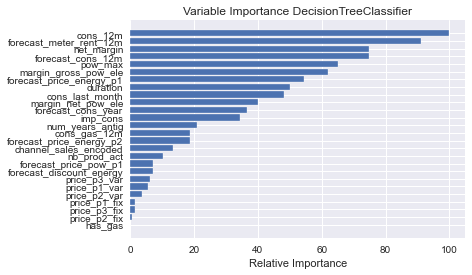

In [416]:
def plot_importance(model):
    """
    Fuction to plot variable importance from machine learning model.
    Note: the model requires to have "model.feature_importances_".
   
    Inputs
    -------
    - model: a model with a object ".feature_importances_"

    Returns
    -------
    - feature importance plot
   

    """

    feature_importance = model.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title(f'Variable Importance {model.__class__.__name__}')
    plt.show()

plot_importance(clf)

We notice that the consumption of the clients are the features that influence more the model for the DecisionTreeClassifier, as for the kNN, we obtain a very high accuracy and F1 score.

The most accurate models were the SVMs and Logistic Regression which display the same performances: 90% accuracy and 47% for the F1-score, by examining them more closely, we notice that they just categorize everything as negative. This allows the algorithms to have a good accuracy as the data is unbalanced, but the presence of the F1-score metric allows us to see that the models are not efficient.

Finally, the kNN (k nearest neighbors) algorithm displays a perfect score of 100% on the accuracy and F1 score! This can be explained by the kNN algorithm having a complex non-linear decision boundary curve (curve separating the positive classes from the negative classes) with regions clustered around certain points, thus allowing to isolate the areas where the positive classified points appear.

## Conclusion

By looking though all the notebook, we can observe the different steps we took; from analyzing the churned customers over the past 3 months, cleaning the data to using the different ML models to predict if the pricing of the services is a decision churn variable.

Through this analysis we can conclude that there is no certainty that variable pricing is a factor of which customers churn.

In [417]:
#Exporting the files

In [418]:
train.to_csv('Clean_train_data.csv',index=False)

In [420]:
X_total.to_csv('X_train_data.csv',index=False)
y_total.to_csv('Y_train_data.csv',index=False)